In [ ]:
!pip install tensorflow gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.0 MB/s eta 0:00:00


In [ ]:
!pip install keras


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xvf '/content/drive/MyDrive/datasets-v2.tar' -C /content/


datasets/
datasets/README.md
datasets/train-labels-task1-span-identification/
datasets/train-labels-task1-span-identification/article728972961.task1-SI.labels
datasets/train-labels-task1-span-identification/article111111136.task1-SI.labels
datasets/train-labels-task1-span-identification/article790667730.task1-SI.labels
datasets/train-labels-task1-span-identification/article770156851.task1-SI.labels
datasets/train-labels-task1-span-identification/article786250729.task1-SI.labels
datasets/train-labels-task1-span-identification/article766632016.task1-SI.labels
datasets/train-labels-task1-span-identification/article786344683.task1-SI.labels
datasets/train-labels-task1-span-identification/article999000880.task1-SI.labels
datasets/train-labels-task1-span-identification/article999000147.task1-SI.labels
datasets/train-labels-task1-span-identification/article696694316.task1-SI.labels
datasets/train-labels-task1-span-identification/article781847297.task1-SI.labels
datasets/train-labels-task1-spa

In [ ]:
import os

# List all files in the extracted folder
for root, dirs, files in os.walk('/content/datasets'):
    for file in files:
        print(os.path.join(root, file))


/content/datasets/dev-task-TC-template.out
/content/datasets/train-task2-TC.labels
/content/datasets/train-task1-SI.labels
/content/datasets/README.md
/content/datasets/train-labels-task1-span-identification/article699291100.task1-SI.labels
/content/datasets/train-labels-task1-span-identification/article727869189.task1-SI.labels
/content/datasets/train-labels-task1-span-identification/article713130996.task1-SI.labels
/content/datasets/train-labels-task1-span-identification/article778664280.task1-SI.labels
/content/datasets/train-labels-task1-span-identification/article704856340.task1-SI.labels
/content/datasets/train-labels-task1-span-identification/article759478604.task1-SI.labels
/content/datasets/train-labels-task1-span-identification/article755170235.task1-SI.labels
/content/datasets/train-labels-task1-span-identification/article737194975.task1-SI.labels
/content/datasets/train-labels-task1-span-identification/article729303442.task1-SI.labels
/content/datasets/train-labels-task1-sp

In [ ]:
import os
import pandas as pd

# Folder with article files
article_folder = '/content/datasets/train-articles/'

# List all article files
article_files = sorted(os.listdir(article_folder))

# Read all articles into a DataFrame
articles = []
for filename in article_files:
    file_path = os.path.join(article_folder, filename)
    with open(file_path, 'r', encoding='utf-8') as f:
        articles.append({
            'id': filename.replace('.txt', ''),
            'text': f.read()
        })

df_articles = pd.DataFrame(articles)
df_articles.head()


,id,text
0,article111111111,Next plague outbreak in Madagascar could be 's...
1,article111111112,US bloggers banned from entering UK\n\nTwo pro...
2,article111111113,Kate Steinle's death at the hands of a Mexican...
3,article111111114,U.S. judge frees Indonesian immigrant held by ...
4,article111111115,Here are all the sexual misconduct accusations...


In [ ]:
labels = pd.read_csv('/content/datasets/train-task2-TC.labels', sep='\t', header=None)
labels.head()


,0,1,2,3
0,111111111,Appeal_to_Authority,265,323
1,111111111,Appeal_to_Authority,1795,1935
2,111111111,Doubt,149,157
3,111111111,Repetition,1069,1091
4,111111111,Appeal_to_fear-prejudice,1334,1462


In [ ]:
labels.columns = ['article_id', 'technique', 'start', 'end']
labels.head()


,article_id,technique,start,end
0,111111111,Appeal_to_Authority,265,323
1,111111111,Appeal_to_Authority,1795,1935
2,111111111,Doubt,149,157
3,111111111,Repetition,1069,1091
4,111111111,Appeal_to_fear-prejudice,1334,1462


In [ ]:
import os

article_files = os.listdir('/content/datasets/train-articles')
print(article_files[:5])  # Show just a few filenames


['article725824328.txt', 'article729581752.txt', 'article708071969.txt', 'article741802985.txt', 'article729700539.txt']


In [ ]:
# Load a real article from the available filenames
with open('/content/datasets/train-articles/article999000159.txt', 'r', encoding='utf-8') as f:
    article_text = f.read()

# Show part of the article
print(article_text[:1000])


Scorecard: See If Your Representative Or Senator Supports The Second Amendment Or Not

With just weeks to go till the 2018 midterm elections, there are lots of seats up for grabs.
With that in mind, one of the most important areas our representatives need to be strong in is on your right to keep and bear arms, protected in the Second Amendment.
Gun Owners of America has put out their scorecard and for some, it will be eye-opening.
GOA Executive Director Erich Pratt writes:
The anti-gun Left is hopping-mad, now that Judge Brett Kavanaugh has been confirmed to the Supreme Court.
take our poll - story continues below
Should military force be used to stop the caravan of migrants marching toward the U.S. border?
Should military force be used to stop the caravan of migrants marching toward the U.S. border?
Should military force be used to stop the caravan of migrants marching toward the U.S. border?
* Yes, military force should be used.
No, keep the military out of it.
Email *
Email This fie

In [ ]:
import os

article_dir = '/content/datasets/train-articles'
article_texts = {}

for filename in os.listdir(article_dir):
    if filename.endswith('.txt'):
        article_id = filename.replace('article', '').replace('.txt', '')
        with open(os.path.join(article_dir, filename), 'r', encoding='utf-8') as f:
            article_texts[article_id] = f.read()


In [ ]:
def extract_span(row):
    article_id = row[0]
    start = row[2]
    end = row[3]
    text = article_texts.get(str(article_id), "")
    return text[start:end]

labels['text_span'] = labels.apply(extract_span, axis=1)
labels.columns = ['article_id', 'technique', 'start', 'end', 'text_span']
labels.head()


<ipython-input-13-f526d9f8e5cc>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  article_id = row[0]
<ipython-input-13-f526d9f8e5cc>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = row[2]
<ipython-input-13-f526d9f8e5cc>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end = row[3]


,article_id,technique,start,end,text_span
0,111111111,Appeal_to_Authority,265,323,The next transmission could be more pronounced...
1,111111111,Appeal_to_Authority,1795,1935,when (the plague) comes again it starts from m...
2,111111111,Doubt,149,157,appeared
3,111111111,Repetition,1069,1091,"a very, very different"
4,111111111,Appeal_to_fear-prejudice,1334,1462,He also pointed to the presence of the pneumon...


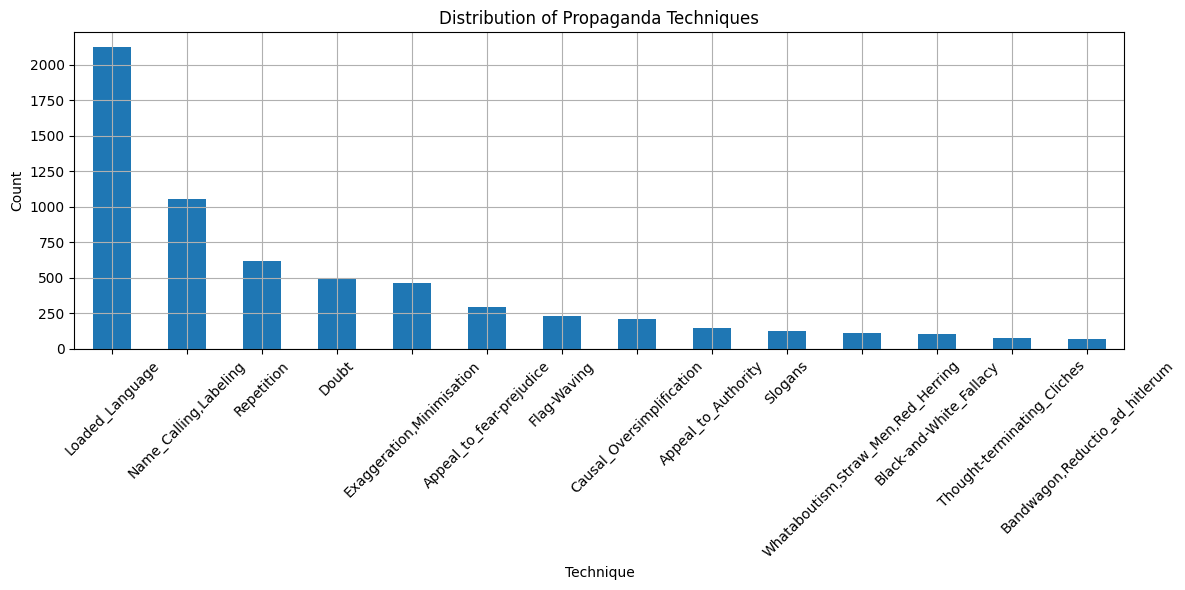

In [ ]:
import matplotlib.pyplot as plt

labels['technique'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title('Distribution of Propaganda Techniques')
plt.xlabel('Technique')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 10000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(labels['text_span'])

sequences = tokenizer.texts_to_sequences(labels['text_span'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels['technique_encoded'] = label_encoder.fit_transform(labels['technique'])

num_classes = len(label_encoder.classes_)
print("Classes:", label_encoder.classes_)


Classes: ['Appeal_to_Authority' 'Appeal_to_fear-prejudice'
 'Bandwagon,Reductio_ad_hitlerum' 'Black-and-White_Fallacy'
 'Causal_Oversimplification' 'Doubt' 'Exaggeration,Minimisation'
 'Flag-Waving' 'Loaded_Language' 'Name_Calling,Labeling' 'Repetition'
 'Slogans' 'Thought-terminating_Cliches'
 'Whataboutism,Straw_Men,Red_Herring']


In [ ]:
import pickle

with open('/content/tokenizer_propaganda.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)

with open('/content/label_encoder.pickle', 'wb') as f:
    pickle.dump(label_encoder, f)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(padded_sequences)
y = np.array(labels['technique_encoded'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 10000
MAX_LEN = 100


tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(labels['text_span'])


sequences = tokenizer.texts_to_sequences(labels['text_span'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels['technique_encoded'] = label_encoder.fit_transform(labels['technique'])
num_classes = len(label_encoder.classes_)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(padded_sequences)
y = np.array(labels['technique_encoded'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=32
)


Epoch 1/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 28s 144ms/step - accuracy: 0.3355 - loss: 2.1299 - val_accuracy: 0.3891 - val_loss: 1.8051
Epoch 2/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.4036 - loss: 1.7486 - val_accuracy: 0.4421 - val_loss: 1.7208
Epoch 3/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 41s 154ms/step - accuracy: 0.5032 - loss: 1.4836 - val_accuracy: 0.5033 - val_loss: 1.6288
Epoch 4/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 26s 167ms/step - accuracy: 0.6500 - loss: 1.1101 - val_accuracy: 0.5065 - val_loss: 1.6738
Epoch 5/5
154/154 ━━━━━━━━━━━━━━━━━━━━ 37s 142ms/step - accuracy: 0.7200 - loss: 0.8592 - val_accuracy: 0.4886 - val_loss: 1.7866


In [ ]:
model.save('/content/final_propaganda_model.keras')


In [ ]:
class_labels = list(label_encoder.classes_)


In [ ]:
import pickle

# Save tokenizer
with open('/content/tokenizer_propaganda.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save label encoder
with open('/content/label_encoder.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Define and save class labels
class_labels = list(label_encoder.classes_)
with open('/content/class_labels.pkl', 'wb') as f:
    pickle.dump(class_labels, f)


In [ ]:
# Load the trained model
model = tf.keras.models.load_model('/content/final_propaganda_model.keras')

# Load the tokenizer
with open('/content/tokenizer_propaganda.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Load the label encoder
with open('/content/label_encoder.pickle', 'rb') as handle:
    label_encoder = pickle.load(handle)

# Get class names
class_labels = list(label_encoder.classes_)


In [ ]:
from google.colab import files

files.download('/content/final_propaganda_model.keras')
files.download('/content/tokenizer_propaganda.pickle')
files.download('/content/label_encoder.pickle')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/tokenizer_propaganda.pickle')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


model = tf.keras.models.load_model('/content/final_propaganda_model.keras')


with open('/content/tokenizer_propaganda.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


with open('/content/label_encoder.pickle', 'rb') as handle:
    label_encoder = pickle.load(handle)


In [ ]:
def detect_propaganda(text):
    # Preprocess input
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=MAX_LEN, padding='post')

    # Predict
    predictions = model.predict(padded)[0]

    # Set threshold
    threshold = 0.1  # Make it sensitive — adjust if needed

    # Load class labels (in same order as model output)
    class_labels = [
        "Appeal_to_Authority", "Appeal_to_fear-prejudice", "Bandwagon,Reductio_ad_hitlerum",
        "Black-and-White_Fallacy", "Causal_Oversimplification", "Doubt",
        "Exaggeration,Minimisation", "Flag-Waving", "Loaded_Language",
        "Name_Calling,Labeling", "Repetition", "Slogans",
        "Thought-terminating_Clichés", "Whataboutism,Straw_Men,Red_Herring"
    ]

    # Multi-label output
    detected = {
        label: float(score)
        for label, score in zip(class_labels, predictions)
        if score > threshold
    }

    return {
        "Propaganda Detected": bool(detected),
        "Detected Techniques": detected
    }


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr

interface = gr.Interface(
    fn=detect_propaganda,
    inputs=gr.Textbox(lines=5, placeholder="Paste your article or comment here...", label="text"),
    outputs="json",
    title="🛡️ Propaganda Detector",
    description="Enter a sentence or paragraph to check for propaganda techniques."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f2f05da184380dc1d0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
